In [ ]:
!pip install squarify

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify as sqf

Caricare il dataframe

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv")
df

,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,Pfizer/BioNTech,135,2020-12-27,ITF,ITF1,13,Abruzzo
1,ABR,Pfizer/BioNTech,7800,2020-12-30,ITF,ITF1,13,Abruzzo
2,ABR,Pfizer/BioNTech,3900,2021-01-05,ITF,ITF1,13,Abruzzo
3,ABR,Pfizer/BioNTech,3900,2021-01-07,ITF,ITF1,13,Abruzzo
4,ABR,Pfizer/BioNTech,3900,2021-01-11,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
5278,VEN,Moderna,-1200,2021-10-11,ITH,ITH3,5,Veneto
5279,VEN,Moderna,1,2021-10-13,ITH,ITH3,5,Veneto
5280,VEN,Moderna,8,2021-10-14,ITH,ITH3,5,Veneto
5281,VEN,Pfizer/BioNTech,4,2021-10-15,ITH,ITH3,5,Veneto


1. Visualizzare il numero totale di record presenti nel file

In [4]:
len(df.index)

5283

2. Visualizzare il numero di record presenti relativi ad una regione inserita dall'utente

In [7]:
regione = str(input("Inserisci regione: "))

df.loc[df['nome_area'] == regione, 'numero_dosi'].count()

Inserisci regione: Lombardia


264

3. Modificare l'esercizio precedente per rispondere con un messaggio appropriato se la regione non è presente

In [9]:
regione = str(input("Inserisci regione: "))
n = df['nome_area'].str.contains(regione).sum()

if n > 0:
  print(df.loc[df['nome_area'] == regione, 'numero_dosi'].count())
else:
  print('La regione inserita non esiste')

Inserisci regione: Milano
La regione inserita non esiste


4. Visualizzare il numero totale di vaccini consegnati in una regione inserita dall'utente

In [11]:
regione = str(input("Inserisci regione: "))
print(df.loc[df['nome_area'] == regione, 'numero_dosi'].sum())

Inserisci regione: Veneto
8088672


5. Visualizzare il numero di vaccini per ogni fornitore

In [12]:
df.groupby('fornitore').agg({'numero_dosi': 'sum'})

,numero_dosi
fornitore,
Janssen,1846104
Moderna,15235940
Pfizer/BioNTech,71327408
Vaxzevria (AstraZeneca),11544591


6. Visualizzare il numero di vaccini per ogni fornitore di una regione inserita dall'utente. Ordinare in ordine
decrescente sul numero di vaccini


In [16]:
regione = str(input("Inserisci regione: "))
df2 = df[df['nome_area'] == regione]
df2 = df2.groupby('fornitore', as_index=False).agg({'numero_dosi': 'sum'}).sort_values('numero_dosi', ascending=False)
df2

Inserisci regione: Abruzzo


,fornitore,numero_dosi
2,Pfizer/BioNTech,1575702
1,Moderna,357200
3,Vaxzevria (AstraZeneca),298450
0,Janssen,35900


7. Visualizzare le informazioni dell'esercizio 6 con un grafico a barre

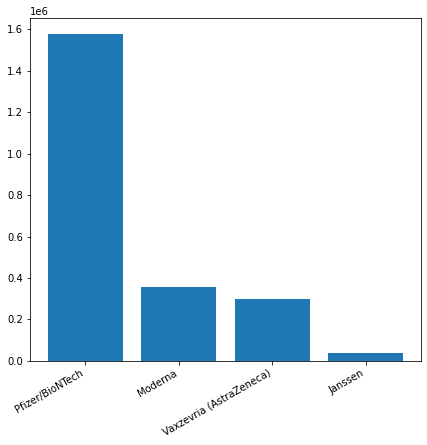

In [23]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes()

ax.bar(df2['fornitore'], df2['numero_dosi'].values)
fig.autofmt_xdate(rotation=30)

plt.show()

8. Visualizzare le informazioni dell'esercizio 6 con un grafico a torta

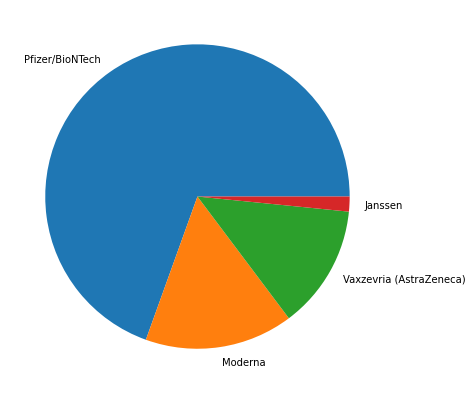

In [25]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes()

ax.pie(df2['numero_dosi'].values, labels=df2['fornitore'])

plt.show()

9. Visualizzare le informazioni dell'esercizio 6 con un grafico treemap

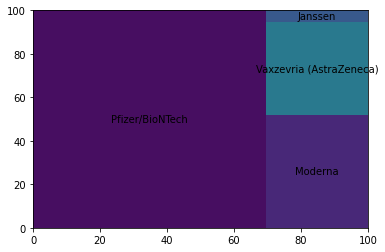

In [35]:
sqf.plot(sizes=df2['numero_dosi'], label=df2['fornitore'])
plt.show()

10. Visualizzare i nomi delle tre regioni in cui sono stati consegnati più vaccini

In [36]:
df2 = df.groupby('nome_area', as_index=False).agg({'numero_dosi': 'sum'}).sort_values('numero_dosi', ascending=False)
df2.head(3)

,nome_area,numero_dosi
8,Lombardia,17274689
6,Lazio,10332809
3,Campania,9179718


11. Visualizzare i nomi delle regioni in cui sono stati consegnati un numero di vaccini inferiore alla media

In [39]:
df2.loc[df2['numero_dosi'] < df2['numero_dosi'].mean(), ["nome_area"]]

,nome_area
2,Calabria
15,Sardegna
7,Liguria
9,Marche
0,Abruzzo
5,Friuli-Venezia Giulia
18,Umbria
1,Basilicata
13,Provincia Autonoma Trento
12,Provincia Autonoma Bolzano / Bozen


12. Visualizzare il grafico delle consegne dei vaccini in Lombardia e nel Lazio. Visualizzare solo i dati delle
consegne avvenute negli utlimi sei mesi. Fare in modo che la data sia determinata in modo automatico